In [ ]:
import pandas as pd

#Google disc
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
from google.colab import files

In [ ]:
'''This function will download files from google disk by id'''
def gdisk_download(id,file_name):
  
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(f'{file_name}') 


In [ ]:
'''Смотрим лайки под положительными твитами и отрицательными'''
def show_likes(df):
  positive_likes = df[df.rating == 2].likes_count.sum()
  print(f"Поддержка позитивных твитов: {positive_likes}")
  negative_likes = df[df.rating == 0].likes_count.sum()
  print(f"Поддержка негативных твитов: {negative_likes}")
  likes_score = positive_likes/negative_likes
  print(f'Пользовательская поддрежка (1 - нейтральное отношение):{round(likes_score,2)}')

In [ ]:
'''Топ 3 самых залайканных твита'''
def show_top_liked(df):
  top_likes = df[['username','tweet','likes_count','rating']].loc[df.likes_count.
                                          sort_values(ascending = False)[0:3].index]

  for i in range(0,3):
    display(f'Автор: {top_likes.iloc[i].username}',
          top_likes.iloc[i].tweet,
          f'Тональность: {classes[top_likes.iloc[i].rating]}',
          f'Лайков: {top_likes.iloc[i].likes_count}',
          '-----------------------------')
    

In [ ]:
'''Смотрим ретвиты под положительными твитами и отрицательными'''
def show_retweets(df):
  positive_retweets = df[df.rating == 2].retweets_count.sum()
  print(f"Распрорстранение позитивных твитов: {positive_retweets}")
  negative_retweets = df[df.rating == 0].retweets_count.sum()
  print(f"Распрорстранение негативных твитов: {negative_retweets}")
  retweets_score = positive_retweets/negative_retweets
  print(f'Тональность распространяемых твитов (1 - нейтральная):{round(retweets_score,2)}')


In [ ]:
'''Топ 3 самых распространяемых твита'''
def show_top_retweeted(df):
  top_retweets = df[['username','tweet','retweets_count','rating']].loc[df.retweets_count.
                                          sort_values(ascending = False)[0:3].index]

  for i in range(0,3):
    display(f'Автор: {top_retweets.iloc[i].username}',
          top_retweets.iloc[i].tweet,
          f'Тональность: {classes[top_retweets.iloc[i].rating]}',
          f'Ретвитов: {top_retweets.iloc[i].retweets_count}',
          '-----------------------------')
  

In [ ]:
'''Смотрим уровень обсуждаемости под положительными твитами и отрицательными'''
def show_replies(df):
  positive_replies = df[df.rating == 2].replies_count.sum()
  print(f"Комментиролвание позитивных твитов: {positive_replies}")
  negative_replies = df[df.rating == 0].replies_count.sum()
  print(f"Комментиролвание негативных твитов: {negative_replies}")
  replies_score = positive_replies/negative_replies
  print(f'Тональность комментируемых твитов (1 - нейтральная):{round(replies_score,2)}')

In [ ]:
'''Топ 3 самых комментируемых твита'''
def show_top_replied(df):
  top_replies = df[['username','tweet','retweets_count','rating']].loc[df.replies_count.
                                          sort_values(ascending = False)[0:3].index]

  for i in range(0,3):
    display(f'Автор: {top_replies.iloc[i].username}',
          top_replies.iloc[i].tweet,
          f'Тональность: {classes[top_replies.iloc[i].rating]}',
          f'Комментариев: {top_replies.iloc[i].retweets_count}',
          '-----------------------------')
    

In [ ]:
classes = ['Негативная','Нейтральная','Положительная']

In [ ]:
'''Downloading dataset'''
gdisk_download('1qNe415iRQvFF4kHxokbHFOtzpdaqEY5q',
               'all.csv')
all_data = pd.read_csv('all.csv')
all_data.head(10)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

id        date         username  \
0  1535264014682530048  2022-06-10     postnauka_ru   
1  1386684692829721088  2021-04-26       asi_russia   
2  1282275681242676992  2020-07-12  mgytaujd2j8amho   
3  1261179391922576896  2020-05-15         civil_73   
4  1255526737506643968  2020-04-29        disliferu   
5  1123483958870774016  2019-05-01  kstnm0fsrsnixwt   
6  1114766259202264960  2019-04-07        fox_nasty   
7  1106137680310611968  2019-03-14          nko37ru   
8  1018754362217287936  2018-07-16      vsekonkursy   
9  1017101471517725056  2018-07-11     chehovchanka   

                                               tweet  replies_count  \
0  Этот материал — часть проекта «Мир особенного ...              0   
1  Фонд «Абсолют-помощь» объявил грантовый #конку...              0   
2  Фонд «Дорога к Дому» компании «Северсталь» пол...              0   
3  Грантовый конкурс, который проводит Благотвори...              0   
4  Благотворительный фонд «Абсолют-Помощь» запуст...              0   
5  Лучшие благотворительные фонды по версии журна...              0   
6  Конкурс социальных проектов "Повышение компете...              0   
7  ⚡ Открыт прием заявок на конкурс социальных пр...              0   
8  Конкурс социальных проектов для особенных дете...              0   
9  #Фонд «#Абсолют-Помощь» объявляет #конкурс про...              0   

   retweets_count  likes_count                        hashtags  \
0               0            0                              []   
1               1            0              ['конкурс', 'нко']   
2               0            0                              []   
3               0            0                              []   
4               0            1                              []   
5               0            0                              []   
6               0            0                              []   
7               0            0                              []   
8               0            0                              []   
9               0            0  ['фонд', 'абсолют', 'конкурс']   

          fond_name  rating  
0  "Абсолют-помощь"       1  
1  "Абсолют-помощь"       1  
2  "Абсолют-помощь"       2  
3  "Абсолют-помощь"       1  
4  "Абсолют-помощь"       2  
5  "Абсолют-помощь"       2  
6  "Абсолют-помощь"       2  
7  "Абсолют-помощь"       2  
8  "Абсолют-помощь"       2  
9  "Абсолют-помощь"       2

#### Фонд Олега Дерипаски "Вольное Дело"

In [ ]:
'''Датафрейм фонда'''
volnoe = all_data[all_data.fond_name == '"Вольное дело"']
volnoe

id        date       username  \
895    874216234463768576  2017-06-12   chancefundru   
896    874213898748133376  2017-06-12   chancefundru   
897    656906259518636032  2015-10-21     oleg250979   
898   1338921861883813888  2020-12-15        elle_ru   
899   1321844306496421888  2020-10-29         wek_ru   
...                   ...         ...            ...   
1220   986529529391865856  2018-04-18    ust_labinsk   
1221   984380671408959488  2018-04-12     petr_login   
1222   955325334794235904  2018-01-22  teploobmennik   
1223   923145863999967232  2017-10-25  southairports   
1224   908602821120892928  2017-09-15    ust_labinsk   

                                                  tweet  replies_count  \
895                                       @svetlyak37                0   
896                                       @svetlyak37                0   
897   @svetlyak37 Принимаем заказы,  Наши координаты...              0   
898   Студия Либо/Либо и фонд Олега Дерипаска «Вольн...              0   
899   Робофест перешел в онлайн-формат  Фонд Олега Д...              0   
...                                                 ...            ...   
1220  Обращение: Дорогие друзья! Обращаемся  к вам з...              0   
1221  @AndreyFedyukin @rianru Олигархи по сути менед...              1   
1222  «Группа ГАЗ»  и Фонд Олега Дерипаски «Вольное ...              0   
1223  Фонд Олега Дерипаски «Вольное Дело» и компания...              0   
1224  ИНФОРМАЦИОННЫЙ КАНАЛ НАРОДНОГО КИНОФЕСТИВАЛЯ «...              0   

      retweets_count  likes_count                           hashtags  \
895                0            0                                 []   
896                0            0                                 []   
897                0            0                                 []   
898                1            1                                 []   
899                0            0  ['робофест', 'фонд', 'дерипаска']   
...              ...          ...                                ...   
1220               0            0                                 []   
1221               0            0                                 []   
1222               0            1                                 []   
1223               0            1                                 []   
1224               0            0                                 []   

           fond_name  rating  
895   "Вольное дело"       1  
896   "Вольное дело"       1  
897   "Вольное дело"       1  
898   "Вольное дело"       1  
899   "Вольное дело"       1  
...              ...     ...  
1220  "Вольное дело"       2  
1221  "Вольное дело"       2  
1222  "Вольное дело"       2  
1223  "Вольное дело"       2  
1224  "Вольное дело"       0  

[330 rows x 10 columns]

In [ ]:
'''Смотрим распределение рейтинга'''
volnoe.rating.value_counts()

1    145
2    110
0     75
Name: rating, dtype: int64

In [ ]:
'''Кто пишет положительно о фонде'''
volnoe[volnoe.rating == 2].username.value_counts()  

volnoedelo       12
19rusinfo         5
vedomosti         3
yuga_ru           3
forbesrussia      2
                 ..
asi_russia        1
tinf_irk          1
yugopolis         1
edu_robots        1
teploobmennik     1
Name: username, Length: 76, dtype: int64

In [ ]:
'''Убираем самопиар и считаем отношение положительных твитов к отрицательным'''
rating_score = round(volnoe.rating[volnoe.username != "volnoedelo"].value_counts()[2] / 
                     volnoe.rating.value_counts()[0],2)
rating_score

1.31

In [ ]:
'''Смотрим лайки под положительными твитами и отрицательными'''
show_likes(volnoe)

Поддержка позитивных твитов: 315
Поддержка негативных твитов: 1214
Пользовательская поддрежка (1 - нейтральное отношение):0.26


In [ ]:
'''Топ 3 самых залайканных твита'''
show_top_liked(volnoe)

'Автор: dw_russian'

'Пока Дерипаска рыбачил на Байкале, Рыбку отпустили, а Фонд борьбы с коррупцией потребовал привлечь к суду его самого за организацию проституции и взяточничество  '

'Тональность: Негативная'

'Лайков: 739'

'-----------------------------'

'Автор: digma28'

'Борис Немцов - немного о русофобии и бизнесе дружков Путина.  "Кому помог Путин? Как зовут его? Дерипаска. Сколько он дал денег этому несчастному нищему парню? Это пенсионные деньги. Он залез в Фонд национального благосостояния и вытащил оттуда 4,5 млрд: "Олежка, на, получи."  '

'Тональность: Негативная'

'Лайков: 160'

'-----------------------------'

'Автор: m_simonyan'

"В моем рейтинге прекрасных мужчин сегодня — @DeripaskaOleg и его фонд 'Вольное дело'.  Он на свои деньги построил новую детскую поликлинику в Тулуне, который практически смыло наводнениями в прошлом году."

'Тональность: Положительная'

'Лайков: 91'

'-----------------------------'

Несмотря на продвижение фондом своих акций, репутация среди аудитории явно отрицательная 

In [ ]:
'''Смотрим ретвиты под положительными твитами и отрицательными'''
show_retweets(volnoe)

Распрорстранение позитивных твитов: 68
Распрорстранение негативных твитов: 564
Тональность распространяемых твитов (1 - нейтральная):0.12


In [ ]:
'''Топ 3 самых распространяемых твита'''
show_top_retweeted(volnoe)

'Автор: dw_russian'

'Пока Дерипаска рыбачил на Байкале, Рыбку отпустили, а Фонд борьбы с коррупцией потребовал привлечь к суду его самого за организацию проституции и взяточничество  '

'Тональность: Негативная'

'Ретвитов: 263'

'-----------------------------'

'Автор: digma28'

'Борис Немцов - немного о русофобии и бизнесе дружков Путина.  "Кому помог Путин? Как зовут его? Дерипаска. Сколько он дал денег этому несчастному нищему парню? Это пенсионные деньги. Он залез в Фонд национального благосостояния и вытащил оттуда 4,5 млрд: "Олежка, на, получи."  '

'Тональность: Негативная'

'Ретвитов: 150'

'-----------------------------'

'Автор: nemtsov_most'

'Борис Немцов - немного о русофобии и бизнесе дружков Путина.  "Кому помог Путин? Как зовут его? Дерипаска. Сколько он дал денег этому несчастному нищему парню? Это пенсионные деньги. Он залез в Фонд национального благосостояния и вытащил оттуда 4,5 млрд: "Олежка, на, получи."  '

'Тональность: Негативная'

'Ретвитов: 49'

'-----------------------------'

Негативные твиты распространяются с подавляющим превосходством

In [ ]:
'''Смотрим уровень обсуждаемости под положительными твитами и отрицательными'''
show_replies(volnoe)

Комментиролвание позитивных твитов: 63
Комментиролвание негативных твитов: 96
Тональность комментируемых твитов (1 - нейтральная):0.66


In [ ]:
'''Топ 3 самых комментируемых твита'''
show_top_replied(volnoe)

'Автор: dw_russian'

'Пока Дерипаска рыбачил на Байкале, Рыбку отпустили, а Фонд борьбы с коррупцией потребовал привлечь к суду его самого за организацию проституции и взяточничество  '

'Тональность: Негативная'

'Комментариев: 263'

'-----------------------------'

'Автор: m_simonyan'

"В моем рейтинге прекрасных мужчин сегодня — @DeripaskaOleg и его фонд 'Вольное дело'.  Он на свои деньги построил новую детскую поликлинику в Тулуне, который практически смыло наводнениями в прошлом году."

'Тональность: Положительная'

'Комментариев: 17'

'-----------------------------'

'Автор: dnp761'

'Дерипаска продаст Челси и на вырученные деньги создаст благотворительный фонд, который будет помогать восстановлению Украины. Рома, а ты часом не прихуел?'

'Тональность: Негативная'

'Комментариев: 6'

'-----------------------------'

Больше обсуждаются негативные твиты

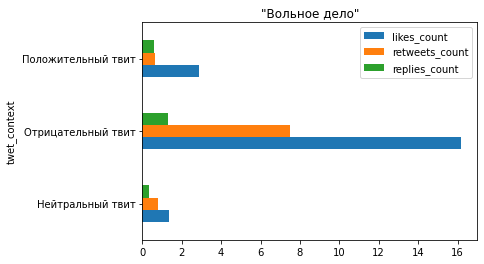

In [ ]:
'''Среднее количество'''

В целом у фонда негативная репутация среди аудитории, завязанная на личность владельца

#### Фонд Тимченко

In [ ]:
'''Датафрейм фонда'''
timchenko = all_data[all_data.fond_name == 'Фонд Тимченко']
timchenko

id        date       username  \
1225  1126162204062114048  2019-05-08  fondtimchenko   
1226  1122891590975000960  2019-04-29  fondtimchenko   
1227  1121451651863326976  2019-04-25  fondtimchenko   
1228  1120357438585176064  2019-04-22  fondtimchenko   
1229  1118173948078850048  2019-04-16  fondtimchenko   
...                   ...         ...            ...   
1536   656095140453466112  2015-10-19  fondtimchenko   
1537   649222805687562240  2015-09-30      fokinvlad   
1538   648809228904361984  2015-09-29     tiflocentr   
1539   630354798873870336  2015-08-09     zabnovosti   
1540   630347827726680064  2015-08-09   azarovkunkur   

                                                  tweet  replies_count  \
1225  «Уютное местечко» — многофункциональная площад...              3   
1226  История Фонда Елены и Геннадия Тимченко начала...              0   
1227  Беседы о возрасте – цикл встреч с известными л...              0   
1228  В переулке мечты города Губахи Пермского края ...              1   
1229  Нам всё больше нравится термин «Young Old», и ...              0   
...                                                 ...            ...   
1536  Благотворительный фонд Елены и Геннадия Тимчен...              0   
1537  Напоминаю,что благот.фонд Елены и Геннадия Тим...              0   
1538  Монологи. Истории пяти женщин, меняющих мир во...              0   
1539  Факультативы по шахматам введут в забайкальски...              0   
1540  Фонд «Елены и Геннадия Тимченко» планирует уве...              0   

      retweets_count  likes_count hashtags      fond_name  rating  
1225               0            2       []  Фонд Тимченко       2  
1226               4            3       []  Фонд Тимченко       2  
1227               1            1       []  Фонд Тимченко       1  
1228               0            0       []  Фонд Тимченко       1  
1229               1            0       []  Фонд Тимченко       2  
...              ...          ...      ...            ...     ...  
1536               0            0       []  Фонд Тимченко       2  
1537               0            2       []  Фонд Тимченко       0  
1538               0            0       []  Фонд Тимченко       2  
1539               0            0       []  Фонд Тимченко       2  
1540               0            0       []  Фонд Тимченко       2  

[316 rows x 10 columns]

In [ ]:
'''Смотрим распределение рейтинга'''
timchenko.rating.value_counts()

2    190
1    105
0     21
Name: rating, dtype: int64

In [ ]:
'''Кто пишет положительно о фонде'''
timchenko[timchenko.rating == 2].username.value_counts()  

fondtimchenko      53
gunvorwatch        17
forbesrussia        6
ruchess_ru          6
asi_russia          5
                   ..
prufy_ru            1
csonsvo             1
yarcube             1
potrtalyaroslav     1
azarovkunkur        1
Name: username, Length: 89, dtype: int64

In [ ]:
'''Убираем самопиар и считаем отношение положительных твитов к отрицательным'''
rating_score = round(timchenko.rating[timchenko.username != "fondtimchenko"].value_counts()[2] / 
                     timchenko.rating.value_counts()[0],2)
rating_score

6.52

In [ ]:
'''Смотрим лайки под положительными твитами и отрицательными'''
show_likes(timchenko)

Поддержка позитивных твитов: 118
Поддержка негативных твитов: 31
Пользовательская поддрежка (1 - нейтральное отношение):3.81


In [ ]:
'''Топ 3 самых залайканных твита'''
show_top_liked(timchenko)

'Автор: borisabramich'

'Forbes узнал схему движения 5-ти триллионов рублей,которые выделят для антикризисных мер: ФНБ(фонд национального благосостояния)—&gt;Ротенберг—&gt;Чемезов—&gt;Тимченко—&gt;Е.Тихонова—&gt;Ролдугин (виолончелист).'

'Тональность: Нейтральная'

'Лайков: 104'

'-----------------------------'

'Автор: victorkvert2008'

'Яхты Алексея Мордашова и Геннадия Тимченко конфискованы в Италии. Их продажа с аукциона существенно пополнит фонд помощи украинским беженцам  '

'Тональность: Нейтральная'

'Лайков: 31'

'-----------------------------'

'Автор: lion_mak5'

'@A_Kapustin ВФБПДТГКЖШ – Всероссийский Фонд по Борьбе с Путиным, Дерипаской, Тимченко, Гомофобами, Килограммами, Жириновским и Шойгу.'

'Тональность: Негативная'

'Лайков: 16'

'-----------------------------'

Максимальные показатели у нейтральных твитов, но в целом репутация положительная

In [ ]:
'''Смотрим ретвиты под положительными твитами и отрицательными'''
show_retweets(timchenko)

Распрорстранение позитивных твитов: 55
Распрорстранение негативных твитов: 4
Тональность распространяемых твитов (1 - нейтральная):13.75


In [ ]:
'''Топ 3 самых распространяемых твита'''
show_top_retweeted(timchenko)

'Автор: borisabramich'

'Forbes узнал схему движения 5-ти триллионов рублей,которые выделят для антикризисных мер: ФНБ(фонд национального благосостояния)—&gt;Ротенберг—&gt;Чемезов—&gt;Тимченко—&gt;Е.Тихонова—&gt;Ролдугин (виолончелист).'

'Тональность: Нейтральная'

'Ретвитов: 36'

'-----------------------------'

'Автор: victorkvert2008'

'Яхты Алексея Мордашова и Геннадия Тимченко конфискованы в Италии. Их продажа с аукциона существенно пополнит фонд помощи украинским беженцам  '

'Тональность: Нейтральная'

'Ретвитов: 10'

'-----------------------------'

'Автор: forbesrussia'

'Фонд Елены и Геннадия Тимченко начинался с небольшого центра помощи детям-сиротам «Ключ» и фонда помощи пожилым «Ладога», а в итоге вырос в масштабный благотворительный семейный фонд  '

'Тональность: Положительная'

'Ретвитов: 6'

'-----------------------------'

Позитивные твиты распространяются с подавляющим превосходством

In [ ]:
'''Смотрим уровень обсуждаемости под положительными твитами и отрицательными'''
show_replies(timchenko)

Комментиролвание позитивных твитов: 16
Комментиролвание негативных твитов: 5
Тональность комментируемых твитов (1 - нейтральная):3.2


In [ ]:
'''Топ 3 самых комментируемых твита'''
show_top_replied(timchenko)

'Автор: ru_rbc'

'Forbes впервые составил рейтинг российских филантропов. На первое место попал фонд Геннадия и Елены Тимченко  '

'Тональность: Положительная'

'Комментариев: 3'

'-----------------------------'

'Автор: borisabramich'

'Forbes узнал схему движения 5-ти триллионов рублей,которые выделят для антикризисных мер: ФНБ(фонд национального благосостояния)—&gt;Ротенберг—&gt;Чемезов—&gt;Тимченко—&gt;Е.Тихонова—&gt;Ролдугин (виолончелист).'

'Тональность: Нейтральная'

'Комментариев: 36'

'-----------------------------'

'Автор: fpogo23'

'Фонд Елены и Геннадия Тимченко! И почему до 6 нельзя хотеть стать хоккеистом?  '

'Тональность: Негативная'

'Комментариев: 0'

'-----------------------------'

Больше обсуждаются позитивные твиты

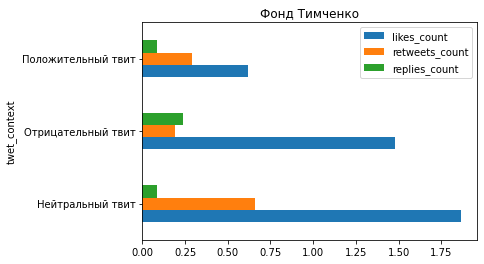

In [ ]:
'''Среднее количество'''

В целом у фонда положительная  репутация среди аудитории.

#### Фонд "Подари жизнь"

In [ ]:
'''Датафрейм фонда'''
podari = all_data[all_data.fond_name == '"Подари жизнь"']
podari

id        date     username  \
1610  1436210423615853056  2021-09-10  podarizhizn   
1611  1435183032546299904  2021-09-07  podarizhizn   
1612  1432627263636446976  2021-08-31  podarizhizn   
1613  1431264705851624960  2021-08-27  podarizhizn   
1614  1431264604231974912  2021-08-27  podarizhizn   
...                   ...         ...          ...   
1757  1506756292160930048  2022-03-23     23kiskis   
1758  1475763884334194944  2021-12-28  mikhashenok   
1759  1475506575083294976  2021-12-27      serov_g   
1760  1475433184082992896  2021-12-27      evighet   
1761  1475414098305294080  2021-12-27  mikhashenok   

                                                  tweet  replies_count  \
1610  Ангелина в 13 лет хорошо разбирается в названи...              6   
1611  Восемь прекрасных женщин рассказали, почему он...              1   
1612  В Красноярске откроется отделение трансплантац...              1   
1613  Здоровый образ жизни не спасет от рака, но рис...              0   
1614  Дарина сказала: «Живите так, как будто я рядом»                0   
...                                                 ...            ...   
1757  А бумеранг никому еще не удалось отменить.  К ...              2   
1758  Ребята, спасибо всем большое, других слов нет....              0   
1759  @mikhashenok @podarizhizn Антон, молодец, что ...              0   
1760  @mikhashenok @podarizhizn Из скрина очень неуд...              0   
1761                        @boevie_50 @podarizhizn его              0   

      retweets_count  likes_count hashtags       fond_name  rating  
1610               1            1       []  "Подари жизнь"       1  
1611               0            0       []  "Подари жизнь"       2  
1612               1            4       []  "Подари жизнь"       2  
1613               0            0       []  "Подари жизнь"       1  
1614               0            0       []  "Подари жизнь"       0  
...              ...          ...      ...             ...     ...  
1757               5            6       []  "Подари жизнь"       0  
1758               0            4       []  "Подари жизнь"       1  
1759               0            2       []  "Подари жизнь"       2  
1760               0            1       []  "Подари жизнь"       0  
1761               0            0       []  "Подари жизнь"       1  

[152 rows x 10 columns]

In [ ]:
'''Смотрим распределение рейтинга'''
podari.rating.value_counts()

0    68
2    47
1    37
Name: rating, dtype: int64

In [80]:
'''Кто пишет положительно о фонде'''
podari[podari.rating == 2].username.value_counts()[0:5]  

podarizhizn        8
svetlan99809534    1
torochiiii         1
elis_20_           1
alkanda7           1
Name: username, dtype: int64

In [ ]:
'''Убираем самопиар и считаем отношение положительных твитов к отрицательным'''
rating_score = round(podari.rating[podari.username != "podarizhizn"].value_counts()[2] / 
                     podari.rating.value_counts()[0],2)
rating_score

0.57

In [ ]:
'''Смотрим лайки под положительными твитами и отрицательными'''
show_likes(podari)

Поддержка позитивных твитов: 703
Поддержка негативных твитов: 814
Пользовательская поддрежка (1 - нейтральное отношение):0.86


In [ ]:
'''Топ 3 самых залайканных твита'''
show_top_liked(podari)

'Автор: cardros'

'Оппа, какой интересный поворот! Хотя, честно сказать, сразу о чем-то таком подумалось.   Дебиторская задолженность фонда «Подари жизнь», известного как фонд актрисы Чулпан Хаматовой, за 2021 год составила более одного миллиарда рублей.  '

'Тональность: Негативная'

'Лайков: 571'

'-----------------------------'

'Автор: alkanda7'

'дима с антоном, поддержавшие «подари жизнь», сделали этот день чуточку лучше'

'Тональность: Положительная'

'Лайков: 540'

'-----------------------------'

'Автор: torochiiii'

'моя новая социальная карта «подари жизнь» выглядит замечательно  '

'Тональность: Положительная'

'Лайков: 62'

'-----------------------------'

У негативных твитов поддрержка немного выше

In [ ]:
'''Смотрим ретвиты под положительными твитами и отрицательными'''
show_retweets(podari)

Распрорстранение позитивных твитов: 6
Распрорстранение негативных твитов: 479
Тональность распространяемых твитов (1 - нейтральная):0.01


In [ ]:
'''Топ 3 самых распространяемых твита'''
show_top_retweeted(podari)

'Автор: cardros'

'Оппа, какой интересный поворот! Хотя, честно сказать, сразу о чем-то таком подумалось.   Дебиторская задолженность фонда «Подари жизнь», известного как фонд актрисы Чулпан Хаматовой, за 2021 год составила более одного миллиарда рублей.  '

'Тональность: Негативная'

'Ретвитов: 435'

'-----------------------------'

'Автор: d5sayyual0rlsbl'

'В фонде актрисы Чулпан Хаматовой пропал миллиард.  Дебиторская задолженность фонда "Подари жизнь", известного как фонд актрисы Чулпан Хаматовой, за 2021 год составила более одного миллиарда рублей.  '

'Тональность: Негативная'

'Ретвитов: 18'

'-----------------------------'

'Автор: deskvajr'

'Чулпан Хаматову заподозрили в отмывании денег через фонд для больных детей  Сбежавшая в Латвию российская актриса Чуплан Хаматова множила свой капитал, прокручивая через банковские счета пожертвованные деньги в фонд «Подари жизнь»  '

'Тональность: Негативная'

'Ретвитов: 10'

'-----------------------------'

Негативные твиты распространяются с подавляющим превосходством

In [ ]:
'''Смотрим уровень обсуждаемости под положительными твитами и отрицательными'''
show_replies(podari)

Комментиролвание позитивных твитов: 8
Комментиролвание негативных твитов: 124
Тональность комментируемых твитов (1 - нейтральная):0.06


In [ ]:
'''Топ 3 самых комментируемых твита'''
show_top_replied(podari)

'Автор: cardros'

'Оппа, какой интересный поворот! Хотя, честно сказать, сразу о чем-то таком подумалось.   Дебиторская задолженность фонда «Подари жизнь», известного как фонд актрисы Чулпан Хаматовой, за 2021 год составила более одного миллиарда рублей.  '

'Тональность: Негативная'

'Комментариев: 435'

'-----------------------------'

'Автор: podarizhizn'

'Ангелина в 13 лет хорошо разбирается в названиях химиопрепаратов. И довольно легко говорит о том, что у нее рецидив.  '

'Тональность: Нейтральная'

'Комментариев: 1'

'-----------------------------'

'Автор: m8r01rwi8f4uhtg'

'@mironov_fm 73000 детей получили помощь фонда "Подари жизнь". Это святое дело. Поддерживала-не поддерживала.. Последнее дело - таких людей осуждать. Надеюсь, фонд будет работать дальше, не смотря ни на что.'

'Тональность: Нейтральная'

'Комментариев: 0'

'-----------------------------'

Больше обсуждаются негативные твиты

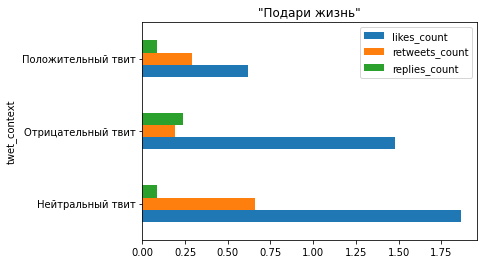

In [ ]:
'''Среднее количество'''

В целом у фонда отрицательная репутация среди аудитории, вызванная скореее всего коррупционным скандалом